In [44]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `prime_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [4]:
data = pd.read_csv('secret/Module-5-DecisionTrees-St-20240724T183240Z-001/Module-5-DecisionTrees-St/pima_indians_diabetes.csv')
data.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and the random forest classifier. Set `n_estimators=100`
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [6]:
X = data.drop('class', axis=1)
y = data['class']


In [7]:
X.isnull().sum()

time_pregnant_no              0
plasma_concentration          0
diastolic_blood_pressure      0
triceps_skinfold_thickness    0
serum_insulin                 0
bmi                           0
diabetes_pedigree             0
age                           0
dtype: int64

In [9]:
zero_columns = X.columns[(X == 0).any()]
zero_columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi'],
      dtype='object')

In [54]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=0, strategy='mean')),
    ('scaler', StandardScaler())
])

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, zero_columns)
    ])

In [56]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7727272727272727

In [58]:
X_train

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [59]:
feature_importances = model.named_steps['classifier'].feature_importances_
features = zero_columns


(array([0.11553031, 0.30954703, 0.11819026, 0.10148457, 0.12651488,
        0.22873295]),
 Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
        'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
        'diabetes_pedigree', 'age'],
       dtype='object'))

                      Feature  Importance
1        plasma_concentration    0.251930
5                         bmi    0.166090
7                         age    0.135507
6           diabetes_pedigree    0.123118
4               serum_insulin    0.095823
2    diastolic_blood_pressure    0.082363
0            time_pregnant_no    0.074088
3  triceps_skinfold_thickness    0.071081


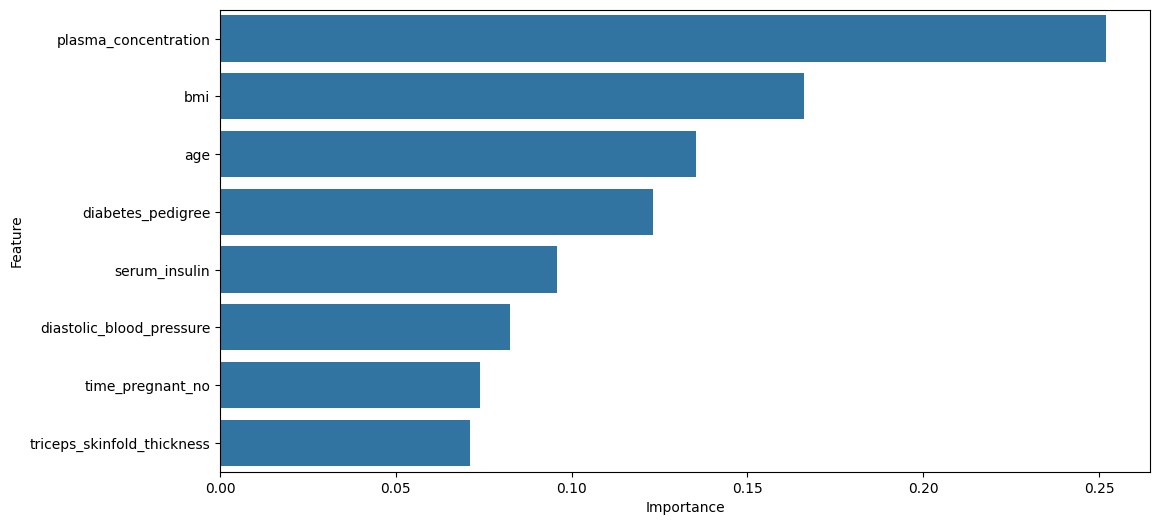

In [81]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.show()

[Text(0.35070353403141363, 0.9666666666666667, 'x[5] <= -0.303\ngini = 0.457\nsamples = 390\nvalue = [397, 217]'),
 Text(0.10798429319371727, 0.9, 'x[4] <= -0.476\ngini = 0.298\nsamples = 162\nvalue = [215, 48]'),
 Text(0.06544502617801047, 0.8333333333333334, 'x[1] <= 0.903\ngini = 0.082\nsamples = 42\nvalue = [67, 3]'),
 Text(0.0549738219895288, 0.7666666666666667, 'gini = 0.0\nsamples = 40\nvalue = [67, 0]'),
 Text(0.07591623036649214, 0.7666666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(0.1505235602094241, 0.8333333333333334, 'x[7] <= 1.009\ngini = 0.358\nsamples = 120\nvalue = [148, 45]'),
 Text(0.0968586387434555, 0.7666666666666667, 'x[1] <= 1.368\ngini = 0.241\nsamples = 91\nvalue = [123, 20]'),
 Text(0.08638743455497382, 0.7, 'x[1] <= -0.128\ngini = 0.204\nsamples = 89\nvalue = [123, 16]'),
 Text(0.020942408376963352, 0.6333333333333333, 'x[4] <= -0.458\ngini = 0.107\nsamples = 60\nvalue = [83, 5]'),
 Text(0.010471204188481676, 0.5666666666666667, 'gini = 0.0\

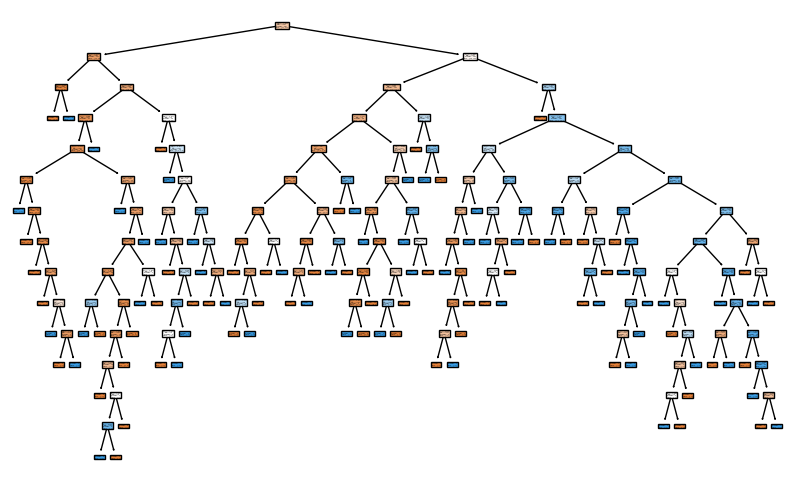

In [82]:
from sklearn import tree
tree.plot_tree(model.named_steps['classifier'].estimators_[0], filled=True)

In [83]:
X


,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [84]:
X_new = X.drop(columns=["triceps_skinfold_thickness"])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [85]:
zero_columns_new = X_new.columns[(X_new == 0).any()]
numerical_transformer_new = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=0, strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_new, X_new.columns)
    ])


In [86]:
model_new = Pipeline(steps=[
    ('preprocessor', preprocessor_new),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [87]:
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

accuracy_score(y_test_new, y_pred_new)

0.7532467532467533

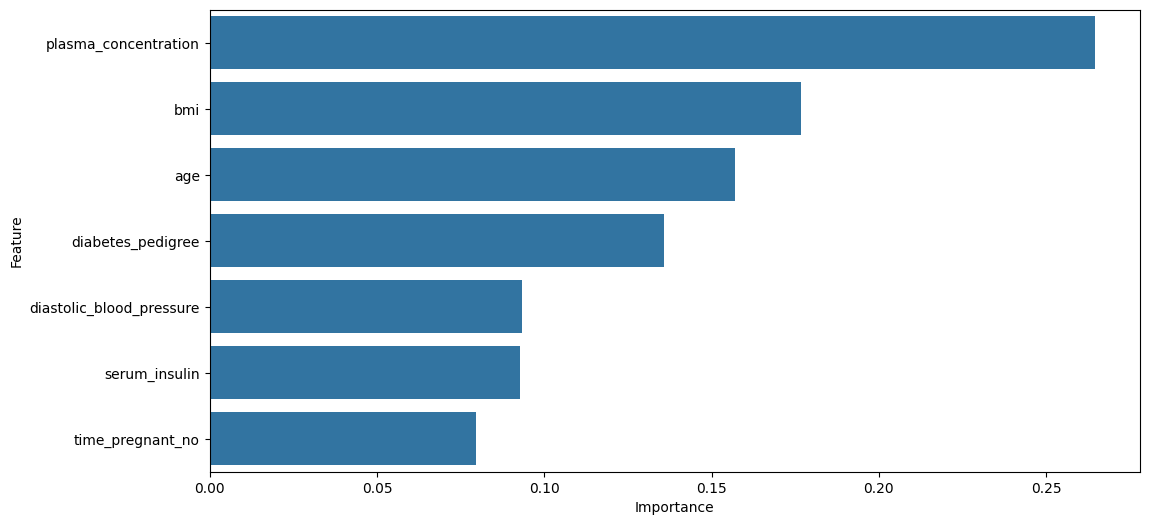

In [88]:
feature_importances_new = model_new.named_steps['classifier'].feature_importances_
features_new = X_new.columns
feature_importance_df_new = pd.DataFrame({'Feature': features_new, 'Importance': feature_importances_new})
feature_importance_df_new = feature_importance_df_new.sort_values(by='Importance', ascending=False)

# Plot feature importances again
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_new)

plt.show()